In [1]:
pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [3]:
file_path = 'Dataset/mental_health_dataset.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset Loaded Successfully")
except FileNotFoundError:
    print(f"Error: File was not found")
    exit()

Dataset Loaded Successfully


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              209 non-null    float64
 1   sex                              210 non-null    object 
 2   hospital_center_id               210 non-null    int64  
 3   condition                        210 non-null    object 
 4   condition_type                   209 non-null    object 
 5   bdi_ii_baseline                  209 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    210 non-null    int64  
 9   mindfulness_therapies_completed  210 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.5+ KB


In [5]:
df.describe()

,age,hospital_center_id,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
count,209.000000,210.000000,209.000000,167.000000,166.000000,210.000000,210.000000
mean,65.220096,1.576190,11.167464,7.479042,6.716867,25.109524,21.604762
std,11.179453,0.867491,8.459502,7.271697,7.335961,32.703575,30.242259
min,25.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,58.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.250000
50%,67.000000,1.000000,10.000000,6.000000,5.000000,9.500000,7.000000
75%,73.000000,2.750000,15.000000,11.000000,9.000000,35.500000,32.500000
max,86.000000,3.000000,43.000000,40.000000,41.000000,180.000000,178.000000


## Dealing with Missing Values

In [6]:
df.isnull().sum()

age                                 1
sex                                 0
hospital_center_id                  0
condition                           0
condition_type                      1
bdi_ii_baseline                     1
bdi_ii_after_intervention_12w      43
bdi_ii_follow_up_24w               44
mindfulness_therapies_started       0
mindfulness_therapies_completed     0
dtype: int64

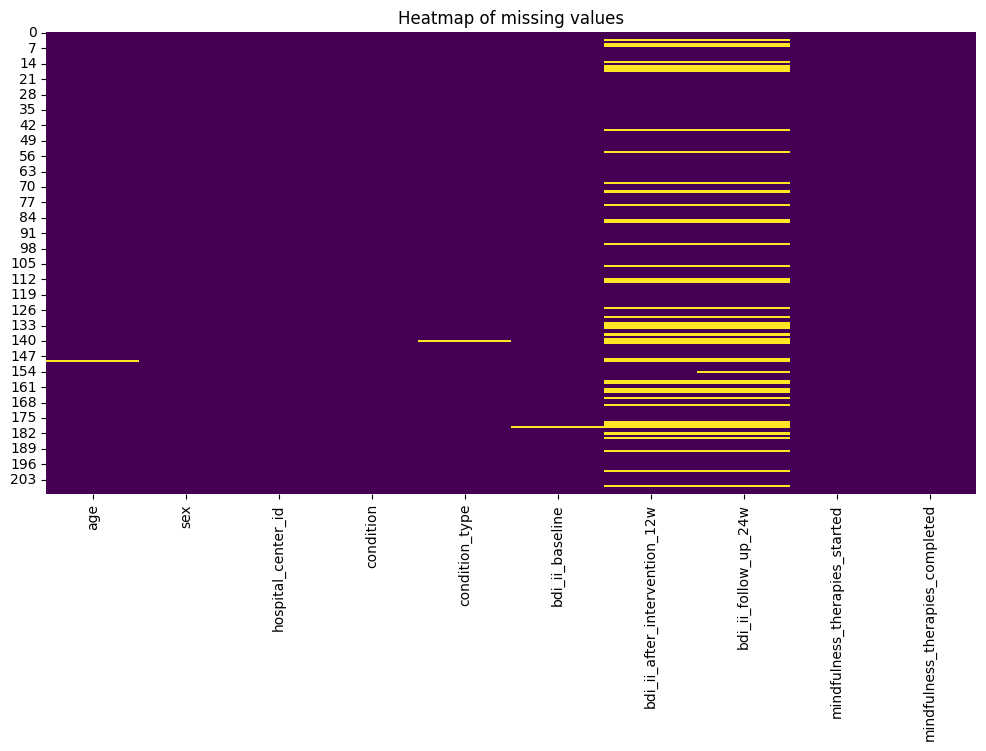

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of missing values")
plt.show()

In [8]:
df_cleaned = df.copy()

In [9]:
df_cleaned.head()

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7


In [10]:
## Dealing with age null value

if df_cleaned['age'].isnull().any():
    median_age = df_cleaned['age'].median()
    df_cleaned['age'].fillna(median_age, inplace=True)
    print(f"Filled missing age values with median: {median_age}")

Filled missing age values with median: 67.0


/var/folders/tq/ccq973m935z0vfy3hz1hmk680000gn/T/ipykernel_3694/4029891587.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['age'].fillna(median_age, inplace=True)


In [11]:
## Dealing with condition type missing values

if df_cleaned['condition_type'].isnull().any():
    mode_condition_type = df_cleaned['condition_type'].mode()[0]
    df_cleaned['condition_type'].fillna(mode_condition_type, inplace=True)
    print(f"filled missing condition_type values with mode: {mode_condition_type}")

filled missing condition_type values with mode: Breast


/var/folders/tq/ccq973m935z0vfy3hz1hmk680000gn/T/ipykernel_3694/3621732522.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['condition_type'].fillna(mode_condition_type, inplace=True)


In [12]:
## Dealing with bdi_ii_baseline missing values

if df_cleaned['bdi_ii_baseline'].isnull().any():
    median_baseline = df_cleaned['bdi_ii_baseline'].median()
    df_cleaned['bdi_ii_baseline'].fillna(median_baseline, inplace=True)
    print(f"Filled missing values with the median values: {median_baseline}")

Filled missing values with the median values: 10.0


/var/folders/tq/ccq973m935z0vfy3hz1hmk680000gn/T/ipykernel_3694/2846433286.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['bdi_ii_baseline'].fillna(median_baseline, inplace=True)


## Feature Engineering

Creating a new column session_completion_rate so that it can make an impact.

In [13]:
df_cleaned['session_completion_rate'] = df_cleaned['mindfulness_therapies_completed'] / df_cleaned['mindfulness_therapies_started']

# Handle cases where therapies_started is 0 to avoid division by zero errors.
df_cleaned['session_completion_rate'].fillna(0, inplace=True)
print("Created 'session_completion_rate' feature.")

Created 'session_completion_rate' feature.


/var/folders/tq/ccq973m935z0vfy3hz1hmk680000gn/T/ipykernel_3694/2711946710.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['session_completion_rate'].fillna(0, inplace=True)


In [14]:
df_cleaned.head()

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed,session_completion_rate
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13,0.928571
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12,0.857143
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4,1.000000
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0,0.000000
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7,0.583333


In [15]:
df_cleaned.isnull().sum()

age                                 0
sex                                 0
hospital_center_id                  0
condition                           0
condition_type                      0
bdi_ii_baseline                     0
bdi_ii_after_intervention_12w      43
bdi_ii_follow_up_24w               44
mindfulness_therapies_started       0
mindfulness_therapies_completed     0
session_completion_rate             0
dtype: int64


--- 4. Generating EDA Visualizations on Cleaned Data ---


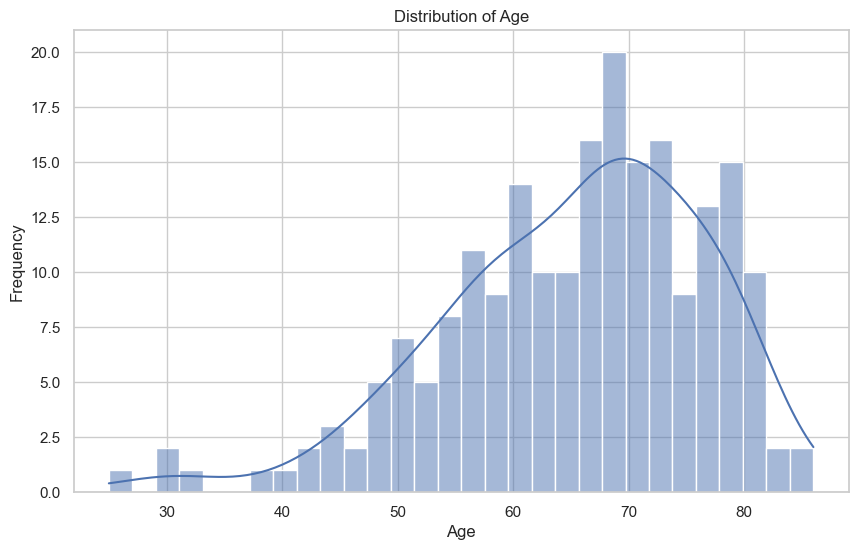

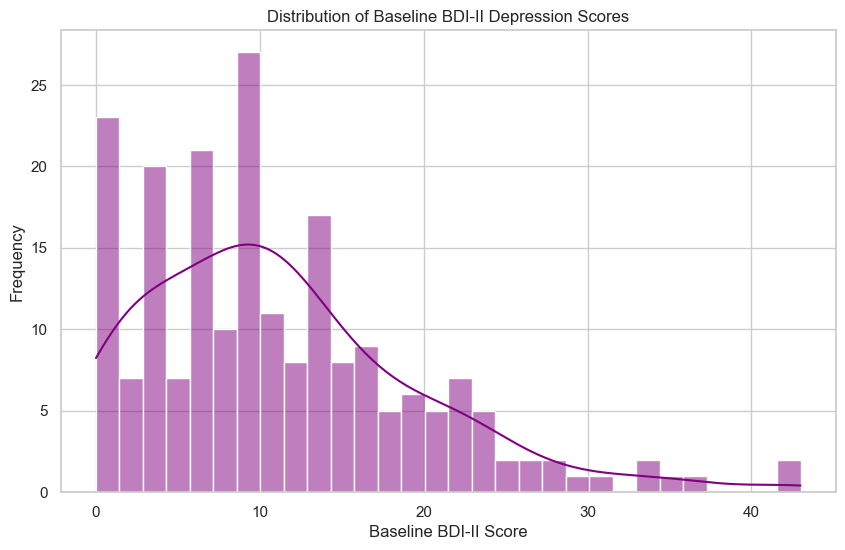

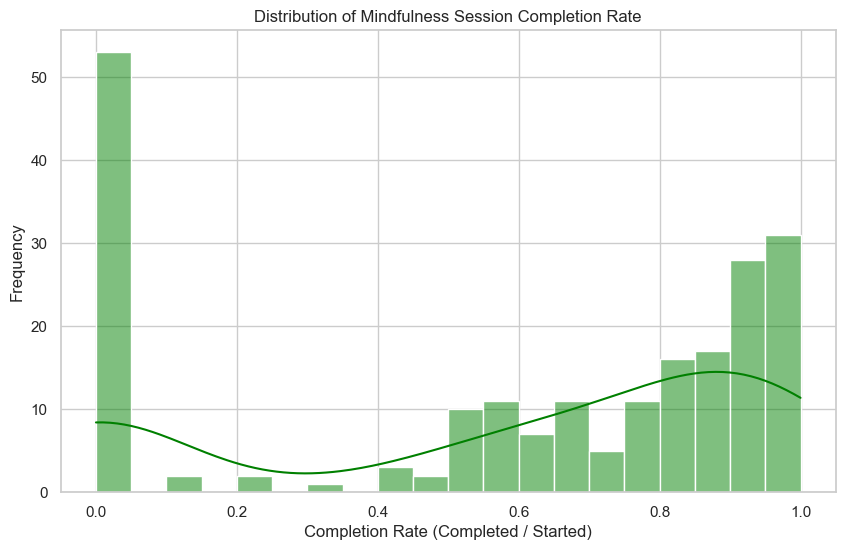

In [16]:
## EXPLORATORY DATA ANALYSIS (EDA) - VISUALIZATIONS ON CLEANED DATA

print("\n--- 4. Generating EDA Visualizations on Cleaned Data ---")
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Distribution of Baseline BDI-II Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['bdi_ii_baseline'], kde=True, bins=30, color='purple')
plt.title('Distribution of Baseline BDI-II Depression Scores')
plt.xlabel('Baseline BDI-II Score')
plt.ylabel('Frequency')
plt.show()


# Distribution of the new Session Completion Rate feature
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['session_completion_rate'], kde=True, bins=20, color='green')
plt.title('Distribution of Mindfulness Session Completion Rate')
plt.xlabel('Completion Rate (Completed / Started)')
plt.ylabel('Frequency')
plt.show()


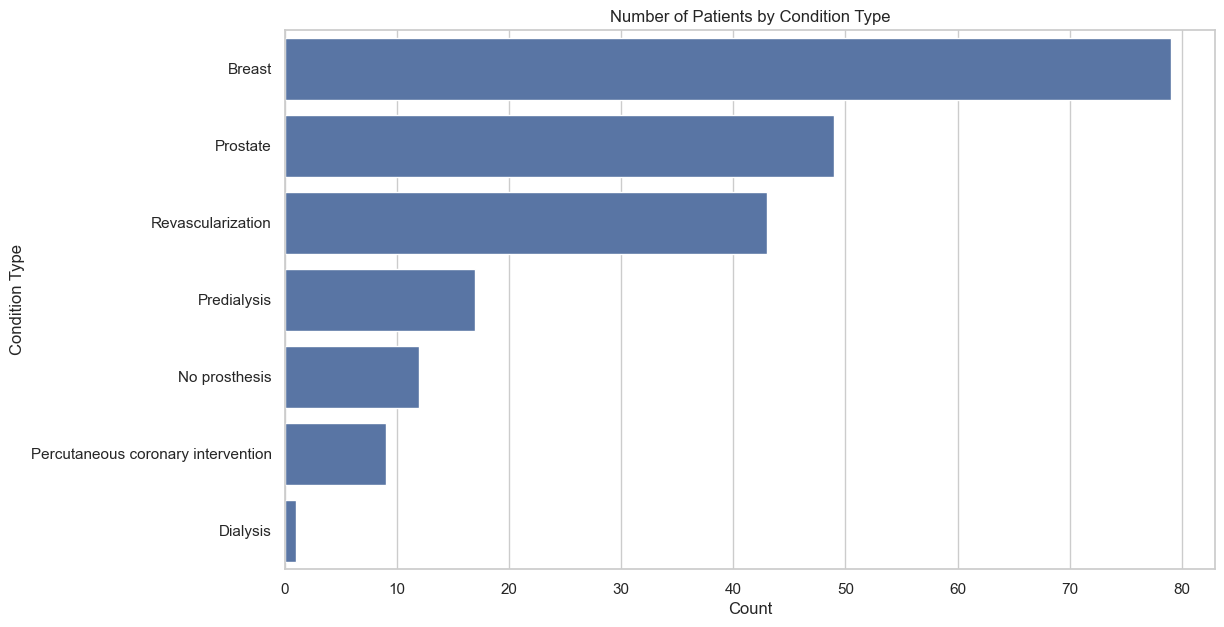

In [17]:
# Count of Patients by Condition Type
plt.figure(figsize=(12, 7))
sns.countplot(y=df_cleaned['condition_type'], order = df_cleaned['condition_type'].value_counts().index)
plt.title('Number of Patients by Condition Type')
plt.xlabel('Count')
plt.ylabel('Condition Type')
plt.show()

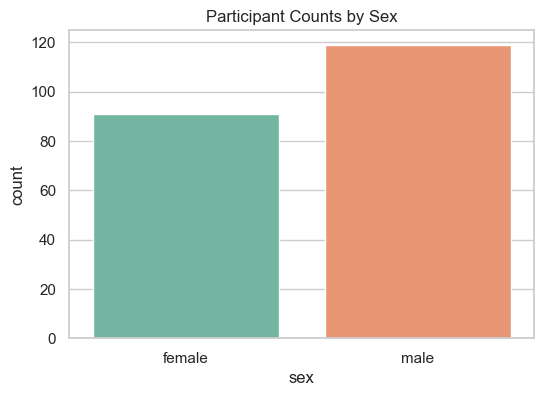

In [18]:
# count of participants by sex
plt.figure(figsize=(6,4))
sns.countplot(x="sex", data=df_cleaned, palette="Set2", hue="sex", legend=False)
plt.title("Participant Counts by Sex")
plt.show()

## Copied from SSR

In [19]:
import numpy as np

# ============================================================
# Step 5: Create Analysis Features
# ============================================================

# 1) Absolute improvements in depression score
# Formula: baseline - followup
# Positive values = symptom reduction (improvement)
# Negative values = worsening
df_cleaned["delta_12w"] = df_cleaned["bdi_ii_baseline"] - df_cleaned["bdi_ii_after_intervention_12w"]
df_cleaned["delta_24w"] = df_cleaned["bdi_ii_baseline"] - df_cleaned["bdi_ii_follow_up_24w"]

# 2) Percentage improvements (relative to baseline)
# Example: baseline=20, followup=10 → delta=10 → 50% improvement
# np.where is used to avoid divide-by-zero errors
df_cleaned["pct_improve_12w"] = np.where(df_cleaned["bdi_ii_baseline"]>0,
                                 100*df_cleaned["delta_12w"]/df_cleaned["bdi_ii_baseline"], np.nan)
df_cleaned["pct_improve_24w"] = np.where(df_cleaned["bdi_ii_baseline"]>0,
                                 100*df_cleaned["delta_24w"]/df_cleaned["bdi_ii_baseline"], np.nan)

# 3) Therapy completion rate // already added in feature engineering
# Formula: completed / started
# Example: started 12, completed 9 → 75% completion
# df_cleaned["completion_rate"] = np.where(df["mindfulness_therapies_started"]>0,
#                                  df["mindfulness_therapies_completed"]/df["mindfulness_therapies_started"], np.nan)

# 4) Flags for whether follow-up data is available
# True if non-missing, False otherwise
df_cleaned["has_12w"] = df_cleaned["bdi_ii_after_intervention_12w"].notna()
df_cleaned["has_24w"] = df_cleaned["bdi_ii_follow_up_24w"].notna()

# 5) Preview new columns
df_cleaned[["delta_12w","delta_24w","pct_improve_12w","pct_improve_24w","session_completion_rate","has_12w","has_24w"]].head()


,delta_12w,delta_24w,pct_improve_12w,pct_improve_24w,session_completion_rate,has_12w,has_24w
0,7.0,3.0,70.000000,30.000000,0.928571,True,True
1,0.0,-4.0,0.000000,-100.000000,0.857143,True,True
2,8.0,5.0,44.444444,27.777778,1.000000,True,True
3,NaN,NaN,NaN,NaN,0.000000,False,False
4,-6.0,-15.0,-120.000000,-300.000000,0.583333,True,True


## Bivariate Analysis (Analyzing relationships between columns)


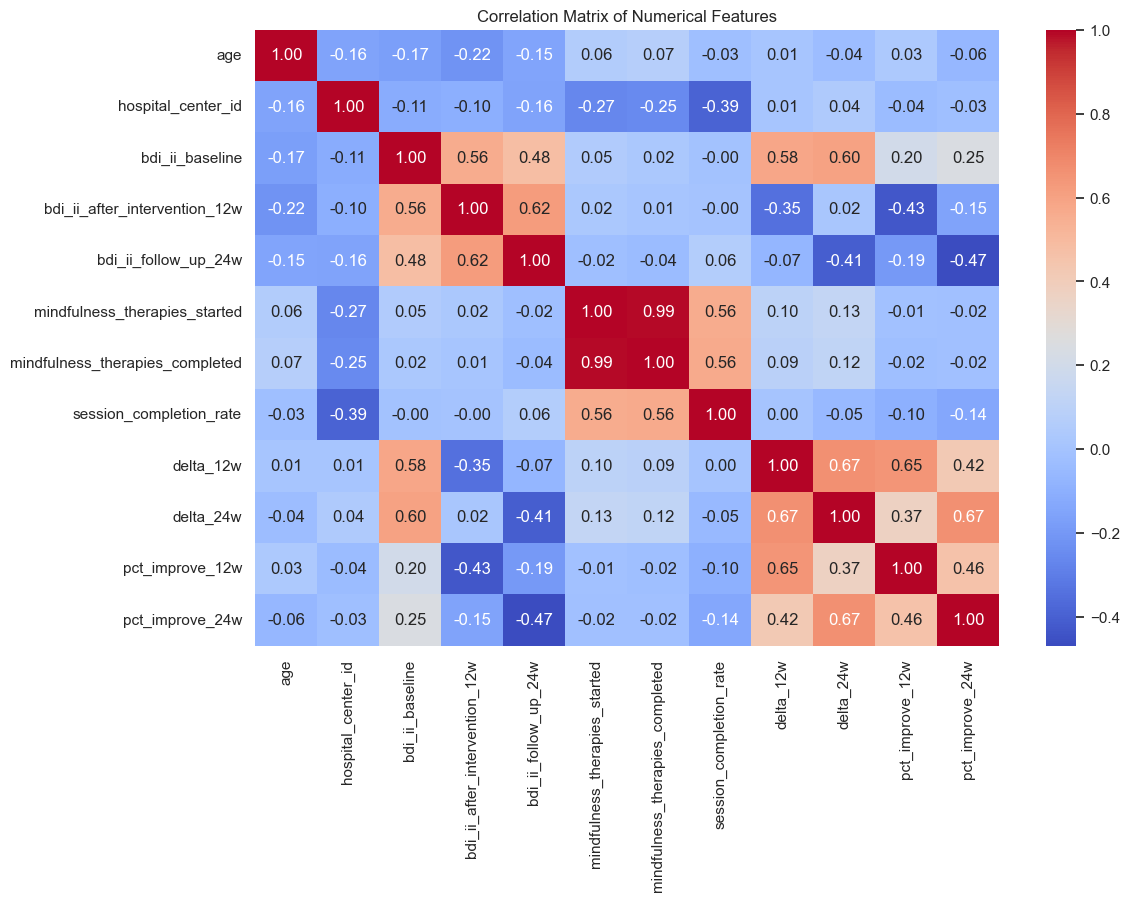

In [20]:
# Correlation Heatmap for numerical variables
plt.figure(figsize=(12, 8))
numeric_cols = df_cleaned.select_dtypes(include=['number'])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

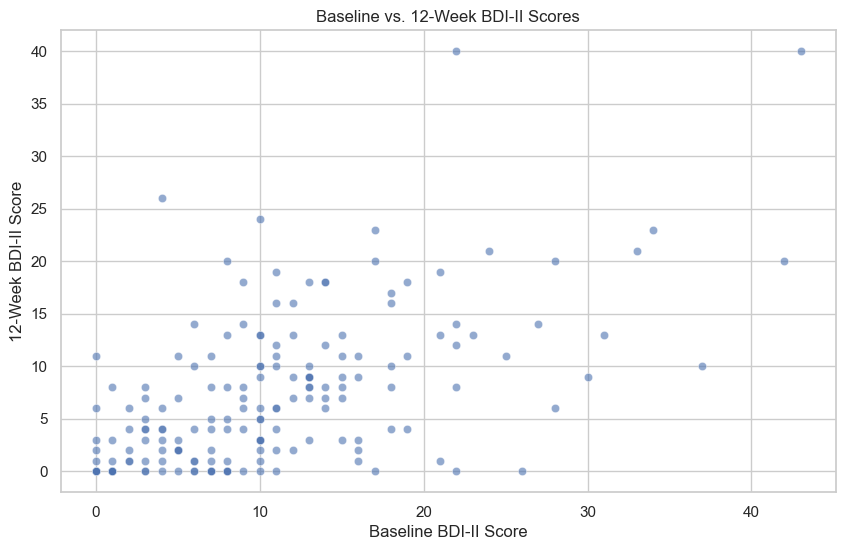

In [21]:
# Scatter plot of Baseline vs. 12-week BDI-II scores (dropping missing values for this plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bdi_ii_baseline', y='bdi_ii_after_intervention_12w', data=df_cleaned.dropna(subset=['bdi_ii_after_intervention_12w']), alpha=0.6)
plt.title('Baseline vs. 12-Week BDI-II Scores')
plt.xlabel('Baseline BDI-II Score')
plt.ylabel('12-Week BDI-II Score')
plt.show()

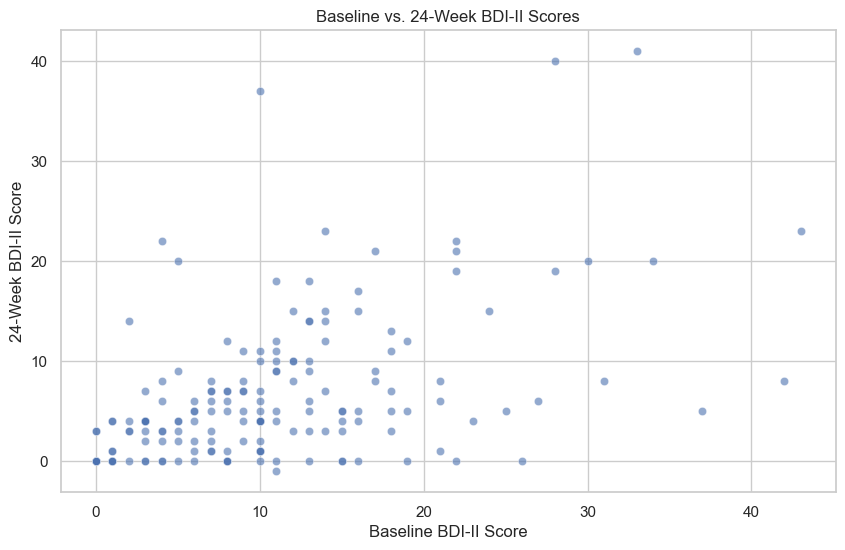

In [22]:
# Scatter plot of Baseline vs. 24-week BDI-II scores (dropping missing values for this plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bdi_ii_baseline', y='bdi_ii_follow_up_24w', data=df_cleaned.dropna(subset=['bdi_ii_follow_up_24w']), alpha=0.6)
plt.title('Baseline vs. 24-Week BDI-II Scores')
plt.xlabel('Baseline BDI-II Score')
plt.ylabel('24-Week BDI-II Score')
plt.show()

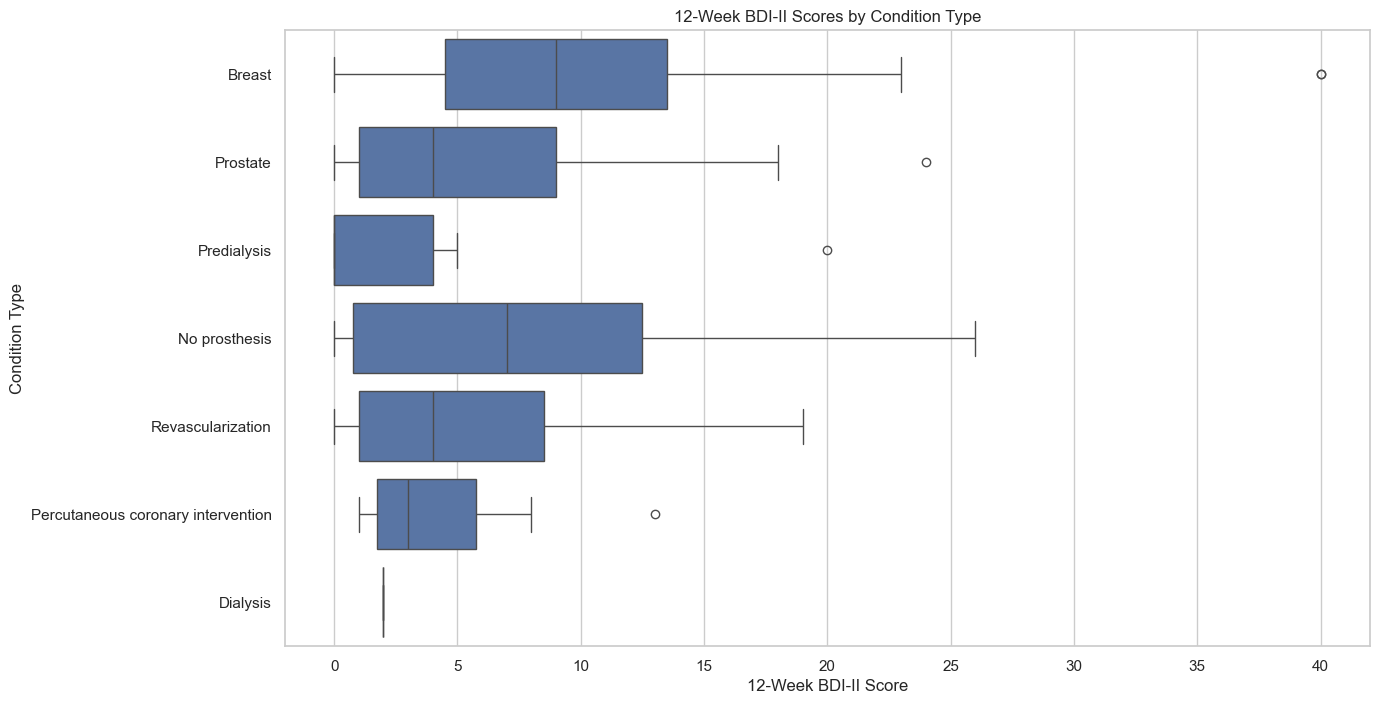

In [23]:
# Box plot of 12-week BDI-II scores across different condition types
plt.figure(figsize=(14, 8))
sns.boxplot(y='condition_type', x='bdi_ii_after_intervention_12w', data=df_cleaned)
plt.title('12-Week BDI-II Scores by Condition Type')
plt.xlabel('12-Week BDI-II Score')
plt.ylabel('Condition Type')
plt.show()

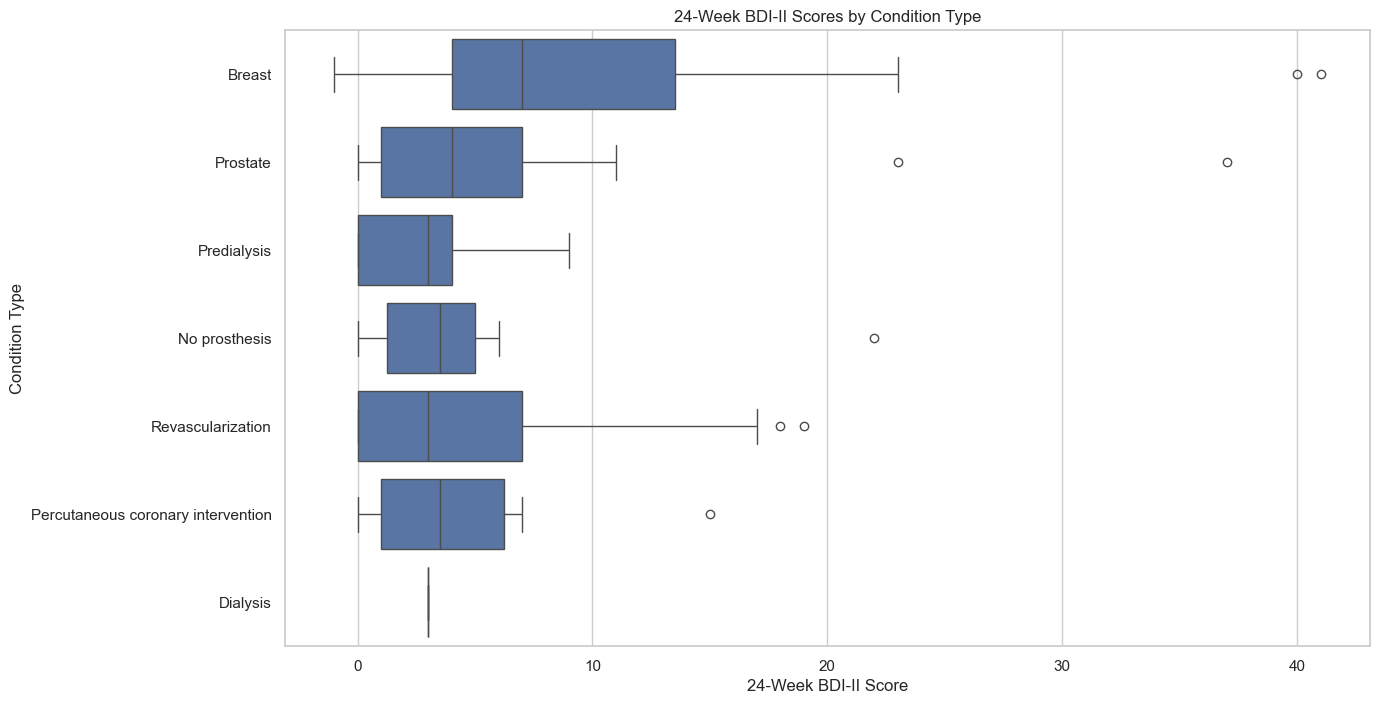

In [24]:
# Box plot of 24-week BDI-II scores across different condition types
plt.figure(figsize=(14, 8))
sns.boxplot(y='condition_type', x='bdi_ii_follow_up_24w', data=df_cleaned)
plt.title('24-Week BDI-II Scores by Condition Type')
plt.xlabel('24-Week BDI-II Score')
plt.ylabel('Condition Type')
plt.show()

Text(0, 0.5, '12-Week BDI-II Score')

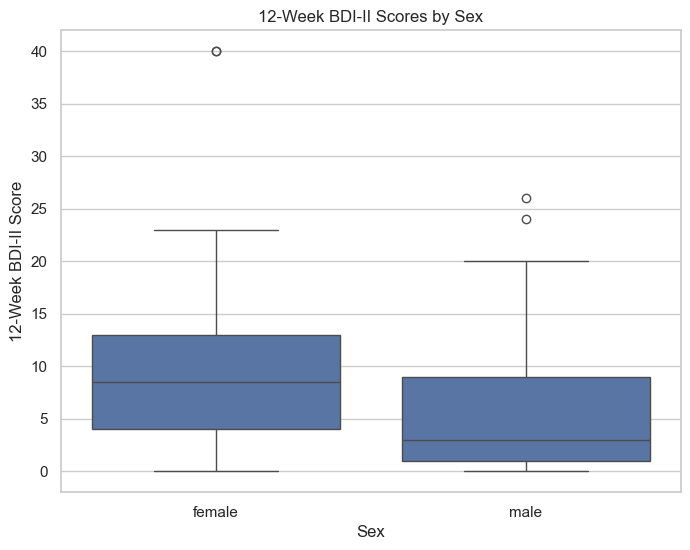

In [25]:
# Box plot for the 'sex' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bdi_ii_after_intervention_12w', data=df_cleaned)
plt.title('12-Week BDI-II Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('12-Week BDI-II Score')

Text(0, 0.5, '24-Week BDI-II Score')

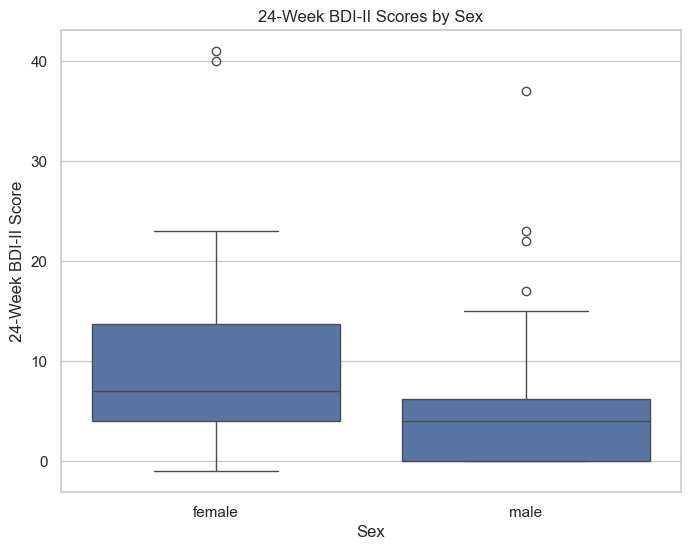

In [26]:
# Box plot for the 'sex' feature
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bdi_ii_follow_up_24w', data=df_cleaned)
plt.title('24-Week BDI-II Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('24-Week BDI-II Score')

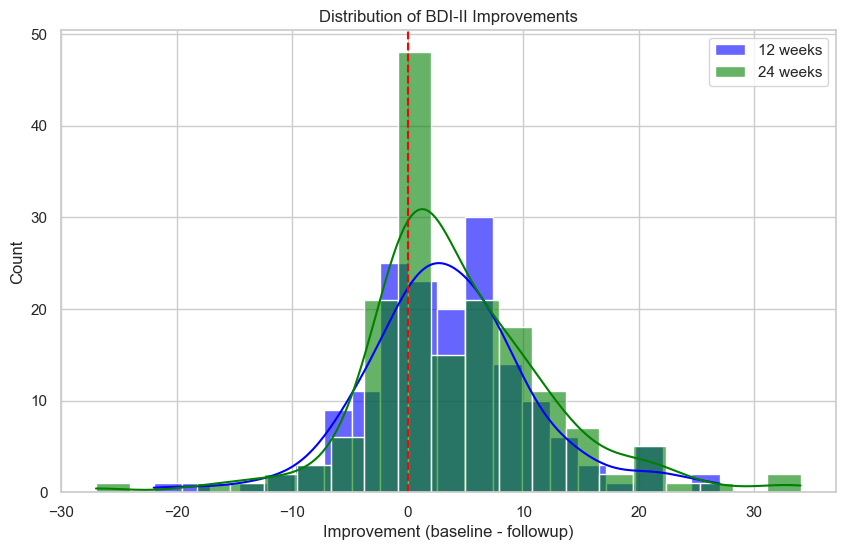

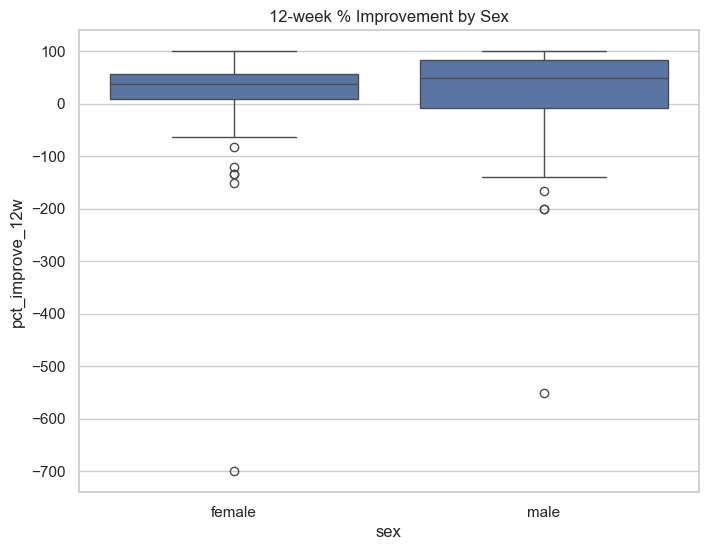

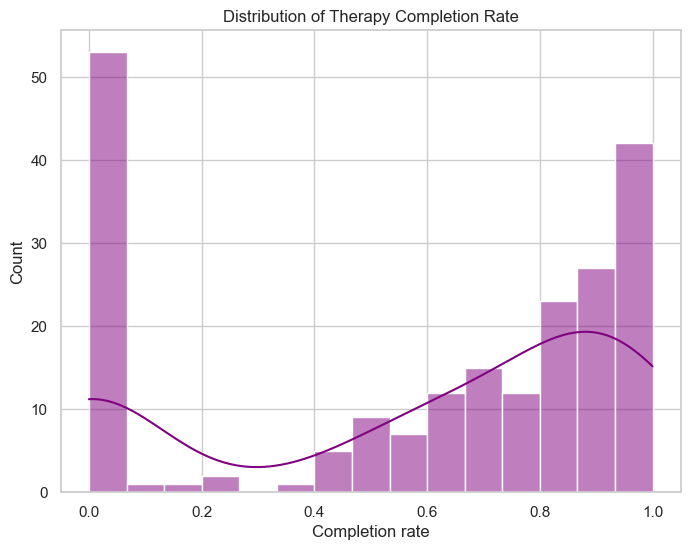

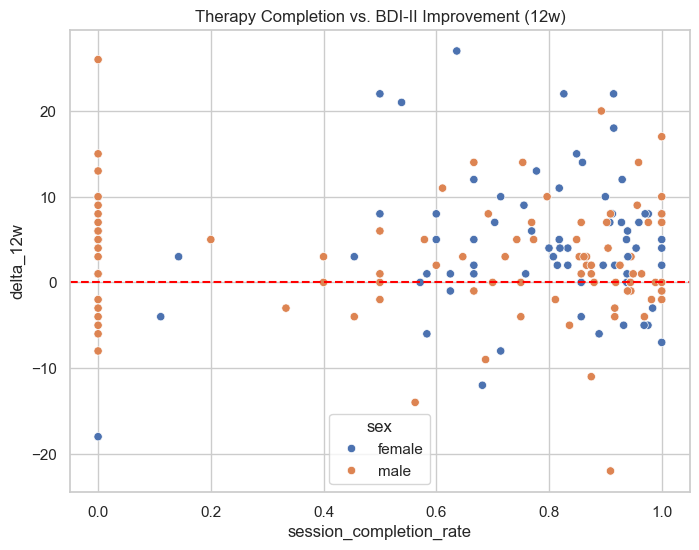

In [27]:
import seaborn as sns

# 1) distribution of BDI-II improvements (12w vs 24w)
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned["delta_12w"].dropna(), kde=True, color="blue", label="12 weeks", alpha=0.6)
sns.histplot(df_cleaned["delta_24w"].dropna(), kde=True, color="green", label="24 weeks", alpha=0.6)
plt.axvline(0, color="red", linestyle="--")
plt.legend()
plt.title("Distribution of BDI-II Improvements")
plt.xlabel("Improvement (baseline - followup)")
plt.show()

# 2) percent improvement comparison by sex
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="pct_improve_12w", data=df_cleaned)
plt.title("12-week % Improvement by Sex")
plt.show()

# 3) therapy completion rate distribution
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned["session_completion_rate"].dropna(), bins=15, kde=True, color="purple")
plt.title("Distribution of Therapy Completion Rate")
plt.xlabel("Completion rate")
plt.show()

# 4) relationship between completion rate & improvement
plt.figure(figsize=(8,6))
sns.scatterplot(x="session_completion_rate", y="delta_12w", hue="sex", data=df_cleaned)
plt.axhline(0, color="red", linestyle="--")
plt.title("Therapy Completion vs. BDI-II Improvement (12w)")
plt.show()


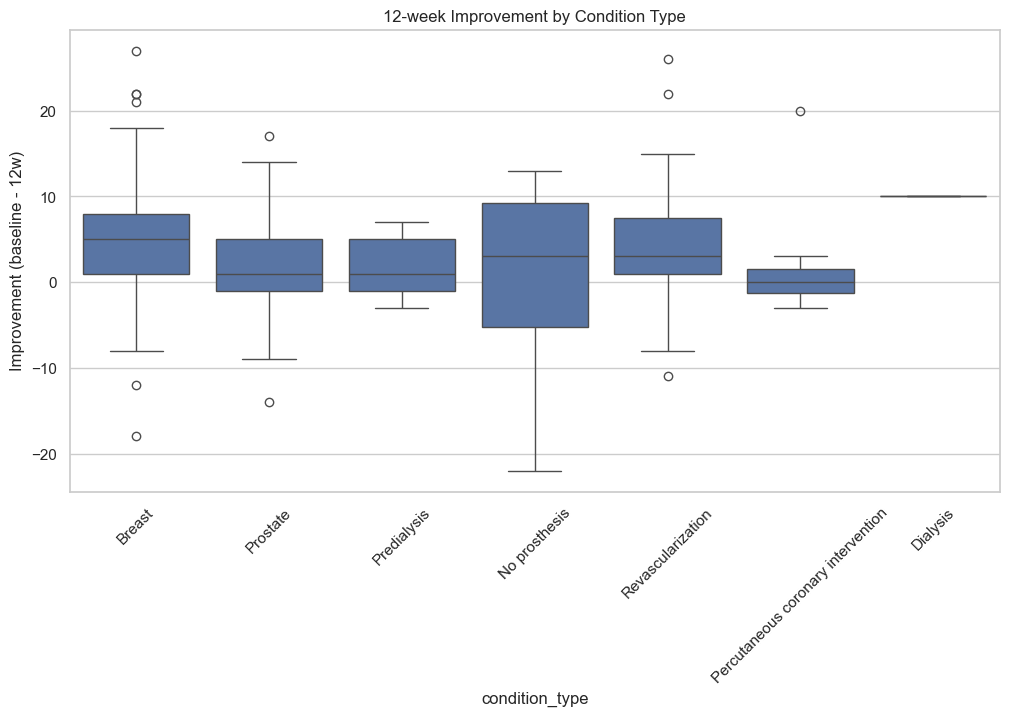

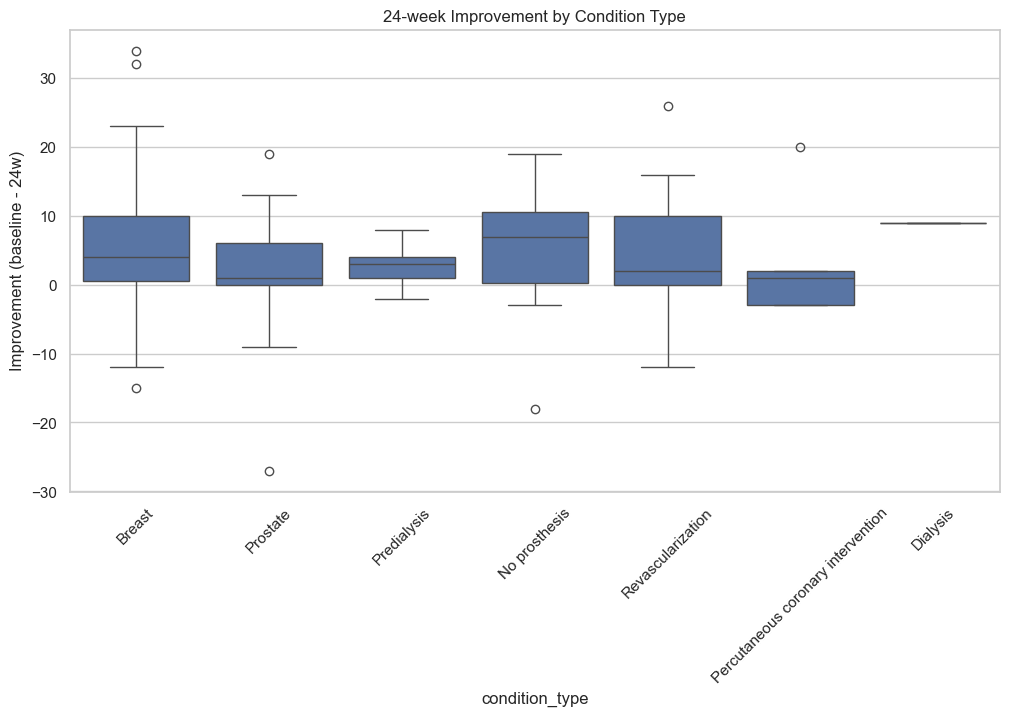

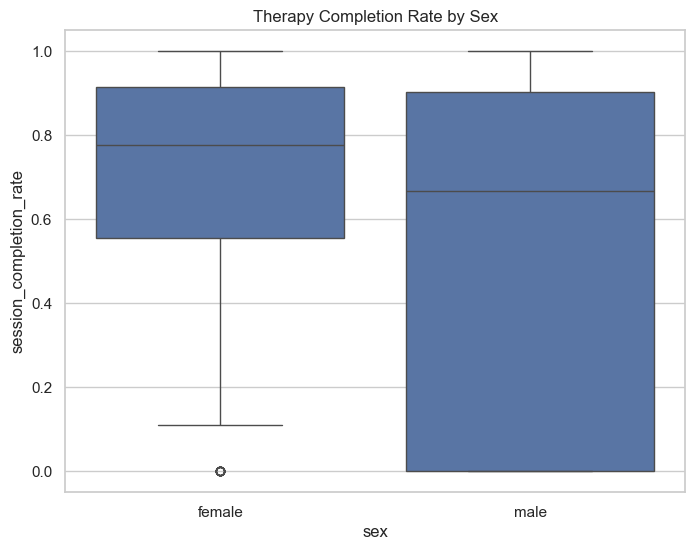

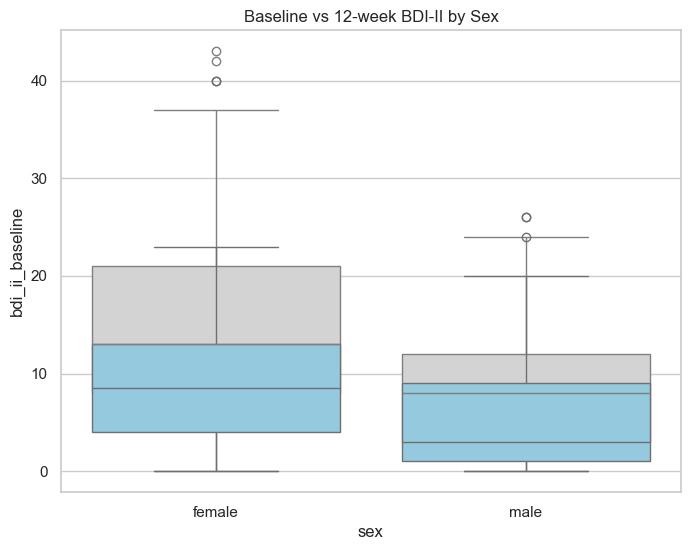

In [28]:
# 1) Improvement by condition type (12 weeks)
plt.figure(figsize=(12,6))
sns.boxplot(x="condition_type", y="delta_12w", data=df_cleaned )
plt.xticks(rotation=45)
plt.title("12-week Improvement by Condition Type")
plt.ylabel("Improvement (baseline - 12w)")
plt.show()

# 2) Improvement by condition type (24 weeks)
plt.figure(figsize=(12,6))
sns.boxplot(x="condition_type", y="delta_24w", data=df_cleaned)
plt.xticks(rotation=45)
plt.title("24-week Improvement by Condition Type")
plt.ylabel("Improvement (baseline - 24w)")
plt.show()

# 3) Compare completion rates by sex
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="session_completion_rate", data=df_cleaned)
plt.title("Therapy Completion Rate by Sex")
plt.show()

# 4) Compare baseline vs 12-week outcomes by sex (paired view)
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="bdi_ii_baseline", data=df, color="lightgray")
sns.boxplot(x="sex", y="bdi_ii_after_intervention_12w", data=df_cleaned, color="skyblue")
plt.title("Baseline vs 12-week BDI-II by Sex")
plt.show()



## Preprocessing

In [29]:
df_cleaned.head()

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed,session_completion_rate,delta_12w,delta_24w,pct_improve_12w,pct_improve_24w,has_12w,has_24w
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13,0.928571,7.0,3.0,70.000000,30.000000,True,True
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12,0.857143,0.0,-4.0,0.000000,-100.000000,True,True
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4,1.000000,8.0,5.0,44.444444,27.777778,True,True
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0,0.000000,NaN,NaN,NaN,NaN,False,False
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7,0.583333,-6.0,-15.0,-120.000000,-300.000000,True,True


In [30]:
cat_cols = ["sex", "condition", "condition_type", "hospital_center_id"]
for c in cat_cols:
    df_cleaned[c] = df_cleaned[c].astype("category")

# Previewing unique values (to sanity check)
for c in cat_cols:
    print(f"\n{c} -> {df_cleaned[c].nunique()} unique values")
    print(df_cleaned[c].cat.categories.tolist()[:10])  # show up to first 10 categories


sex -> 2 unique values
['female', 'male']

condition -> 4 unique values
['Acute coronary syndrome', 'Cancer', 'Lower-limb amputation', 'Renal insufficiency']

condition_type -> 7 unique values
['Breast', 'Dialysis', 'No prosthesis', 'Percutaneous coronary intervention', 'Predialysis', 'Prostate', 'Revascularization']

hospital_center_id -> 3 unique values
[1, 2, 3]


In [31]:
df_encoded = df_cleaned.copy()

In [32]:
sex_mapping = {'female': 0, 'male': 1}

In [33]:
df_encoded['sex'] = df_encoded['sex'].map(sex_mapping)
print("Applied Label Encoding to 'sex' column.")

Applied Label Encoding to 'sex' column.


In [34]:
cat_cols1 = ['condition', 'condition_type', 'hospital_center_id']
df_encoded = pd.get_dummies(df_encoded, columns=cat_cols1, prefix=cat_cols1, dtype=int)
print("Applied One-Hot Encoding to 'condition', 'condition_type', and 'hospital_center_id'.")

Applied One-Hot Encoding to 'condition', 'condition_type', and 'hospital_center_id'.


In [35]:
df_encoded.head()

,age,sex,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed,session_completion_rate,delta_12w,delta_24w,...,condition_type_Breast,condition_type_Dialysis,condition_type_No prosthesis,condition_type_Percutaneous coronary intervention,condition_type_Predialysis,condition_type_Prostate,condition_type_Revascularization,hospital_center_id_1,hospital_center_id_2,hospital_center_id_3
0,78.0,0,10.0,3.0,7.0,14,13,0.928571,7.0,3.0,...,1,0,0,0,0,0,0,1,0,0
1,70.0,0,4.0,4.0,8.0,14,12,0.857143,0.0,-4.0,...,1,0,0,0,0,0,0,1,0,0
2,75.0,0,18.0,10.0,13.0,4,4,1.000000,8.0,5.0,...,1,0,0,0,0,0,0,1,0,0
3,73.0,0,11.0,NaN,NaN,0,0,0.000000,NaN,NaN,...,1,0,0,0,0,0,0,1,0,0
4,62.0,0,5.0,11.0,20.0,12,7,0.583333,-6.0,-15.0,...,1,0,0,0,0,0,0,1,0,0


## Model Training

In [36]:
!pip install shap


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [37]:
import shap

def run_shap_analysis(model, X_test, model_name, target_name):
    """
    Performs SHAP analysis on the best model to explain feature importance.
    """
    print(f"\n--- Running SHAP Analysis for {model_name} on {target_name} ---")
   
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
   
    # Generate the SHAP summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"SHAP Feature Importance for {target_name}\n(Model: {model_name})", fontsize=16)
    plt.tight_layout()
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

def train_and_evaluate(data, target_column):

    print(f"\n{'='*30}")
    print(f"  PREDICTING: {target_column}")
    print(f"{'='*30}\n")
   
    # Drop rows where the target is missing, as we cannot train on them.
    model_data = data.dropna(subset=[target_column])
    
    cols_to_exclude = [
        'bdi_ii_after_intervention_12w', 'bdi_ii_follow_up_24w',
        'delta_12w', 'delta_24w', 'pct_improve_12w', 'pct_improve_24w'
    ]
    X = model_data.drop(columns=[col for col in cols_to_exclude if col in model_data.columns])
    y = model_data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

    models = {
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),  # silence xgboost
    "LightGBM": LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),  # silence LightGBM
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)          # already quiet
}

    results = []
    best_model = None
    best_model_name = ""
    best_rmse = float('inf')

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        results.append({"Model": name, "RMSE": rmse, "R-squared": r2})
       
        # Check if this is the best model so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_model_name = name
           
    results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True).reset_index(drop=True)
    print("\n--- Model Performance Results ---")
    print(results_df)
    print("\nLower RMSE is better. R-squared closer to 1 is better.")
    print(f"\nBEST MODEL: {best_model_name} with RMSE: {best_rmse:.4f}")

    # if best_model_name.startswith("LightGBM"):
    #     print("\nTuning LightGBM hyper-parameters...")
    #     param_grid = {
    #         "num_leaves": [15, 31, 63],
    #         "learning_rate": [0.01, 0.05, 0.1],
    #         "n_estimators": [200, 500, 1000],
    #         "min_child_samples": [5, 10, 20]
    #     }

    #     lgbm = LGBMRegressor(random_state=42, n_jobs=-1)
    #     grid = GridSearchCV(
    #         lgbm,
    #         param_grid,
    #         scoring="neg_root_mean_squared_error",
    #         cv=5,
    #         n_jobs=-1
    #     )
    #     grid.fit(X_train, y_train)

    #     tuned_model = grid.best_estimator_
    #     tuned_pred = tuned_model.predict(X_test)
    #     tuned_rmse = np.sqrt(mean_squared_error(y_test, tuned_pred))
    #     tuned_r2 = r2_score(y_test, tuned_pred)

    #     print("\n--- Tuned LightGBM ---")
    #     print("Best Params:", grid.best_params_)
    #     print(f"RMSE: {tuned_rmse:.4f}, R²: {tuned_r2:.4f}")

    #     # Replace best model if tuned version is superior
    #     if tuned_rmse < best_rmse:
    #         best_model = tuned_model
    #         best_model_name = "LightGBM (tuned)"
    #         best_rmse = tuned_rmse

    #     print(f"\nBEST MODEL: {best_model_name} with RMSE: {best_rmse:.4f}")
    #     return best_model

    if best_model_name != "Ridge Regression":
        run_shap_analysis(best_model, X_test, best_model_name, target_column)


In [39]:
df_encoded["sex"] = df_encoded["sex"].astype(int)

In [40]:
train_and_evaluate(df_encoded, 'bdi_ii_after_intervention_12w')


  PREDICTING: bdi_ii_after_intervention_12w

Training on 133 samples, testing on 34 samples.

--- Model Performance Results ---
              Model      RMSE  R-squared
0  Ridge Regression  5.641217  -0.127353
1     Random Forest  6.210798  -0.366498
2          CatBoost  6.472320  -0.484001
3          LightGBM  6.614239  -0.549794
4           XGBoost  7.242951  -0.858426

Lower RMSE is better. R-squared closer to 1 is better.

BEST MODEL: Ridge Regression with RMSE: 5.6412



  PREDICTING: bdi_ii_follow_up_24w

Training on 132 samples, testing on 34 samples.

--- Model Performance Results ---
              Model      RMSE  R-squared
0          LightGBM  5.042054   0.091948
1          CatBoost  5.242943   0.018148
2           XGBoost  5.695037  -0.158481
3     Random Forest  5.839627  -0.218052
4  Ridge Regression  6.196797  -0.371609

Lower RMSE is better. R-squared closer to 1 is better.

BEST MODEL: LightGBM with RMSE: 5.0421

--- Running SHAP Analysis for LightGBM on bdi_ii_follow_up_24w ---


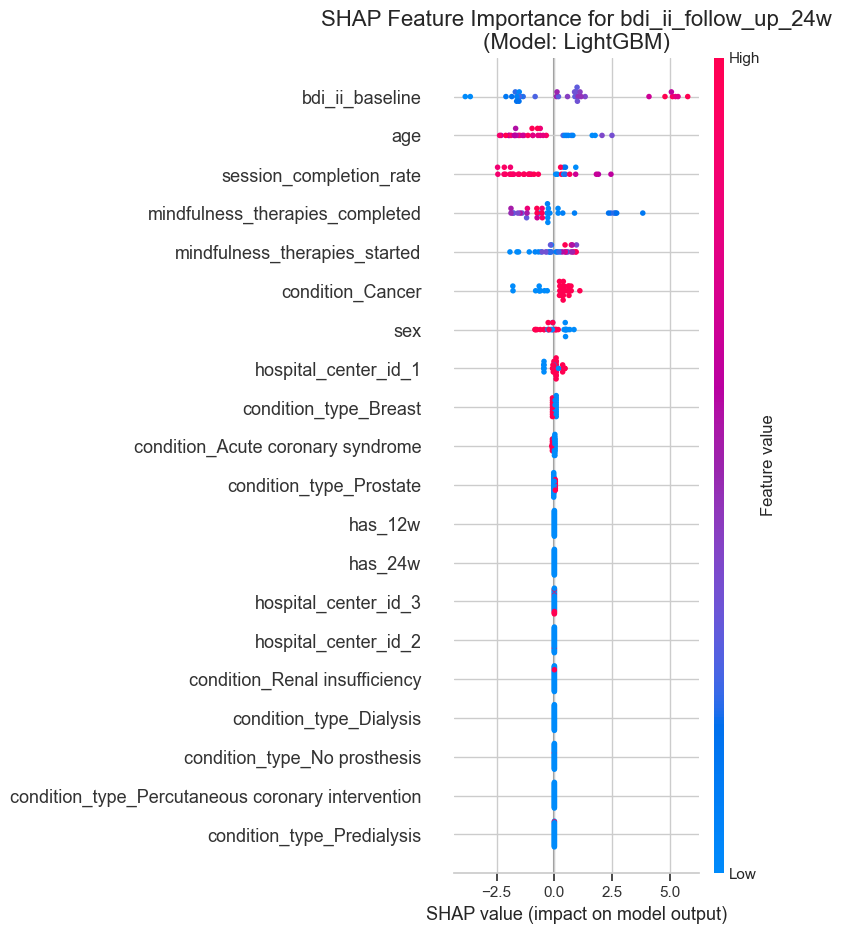

In [41]:
train_and_evaluate(df_encoded, 'bdi_ii_follow_up_24w')

## Feature Selection based on SHAP analysis

In [42]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

def train_and_evaluate_with_FE(data, target_column):

    print(f"\n{'='*30}")
    print(f"  PREDICTING: {target_column}")
    print(f"{'='*30}\n")
   
    # Drop rows where the target is missing, as we cannot train on them.
    model_data = data.dropna(subset=[target_column])
    
    cols_to_exclude = [
        'bdi_ii_after_intervention_12w', 'bdi_ii_follow_up_24w', 'has_12w', 'has_24w', 'hospital_center_id_2', 'hospital_center_id_3',
        'delta_12w', 'delta_24w', 'pct_improve_12w', 'pct_improve_24w', 'mindfulness_therapies_started',	'mindfulness_therapies_completed'
    ]
    X = model_data.drop(columns=[col for col in cols_to_exclude if col in model_data.columns])
    y = model_data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    print(f"Training on {len(X_train)} samples, testing on {len(X_test)} samples.")

    models = {
    "Ridge Regression": Ridge(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),  # silence xgboost
    "LightGBM": LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1),  # silence LightGBM
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)          # already quiet
}

    results = []
    best_model = None
    best_model_name = ""
    best_rmse = float('inf')

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        results.append({"Model": name, "RMSE": rmse, "R-squared": r2})
       
        # Check if this is the best model so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model
            best_model_name = name
           
    results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True).reset_index(drop=True)
    print("\n--- Model Performance Results ---")
    print(results_df)
    print("\nLower RMSE is better. R-squared closer to 1 is better.")
    print(f"\nBEST MODEL: {best_model_name} with RMSE: {best_rmse:.4f}")



    if best_model_name != "Ridge Regression":
        run_shap_analysis(best_model, X_test, best_model_name, target_column)

In [43]:
train_and_evaluate_with_FE(df_encoded, 'bdi_ii_after_intervention_12w')


  PREDICTING: bdi_ii_after_intervention_12w

Training on 133 samples, testing on 34 samples.

--- Model Performance Results ---
              Model      RMSE  R-squared
0  Ridge Regression  5.613380  -0.116254
1     Random Forest  5.646525  -0.129475
2          CatBoost  5.930085  -0.245764
3          LightGBM  6.612319  -0.548894
4           XGBoost  7.040106  -0.755790

Lower RMSE is better. R-squared closer to 1 is better.

BEST MODEL: Ridge Regression with RMSE: 5.6134



  PREDICTING: bdi_ii_follow_up_24w

Training on 132 samples, testing on 34 samples.

--- Model Performance Results ---
              Model      RMSE  R-squared
0          CatBoost  5.169717   0.045383
1           XGBoost  5.257004   0.012875
2          LightGBM  5.412542  -0.046401
3     Random Forest  5.942918  -0.261523
4  Ridge Regression  6.302327  -0.418723

Lower RMSE is better. R-squared closer to 1 is better.

BEST MODEL: CatBoost with RMSE: 5.1697

--- Running SHAP Analysis for CatBoost on bdi_ii_follow_up_24w ---


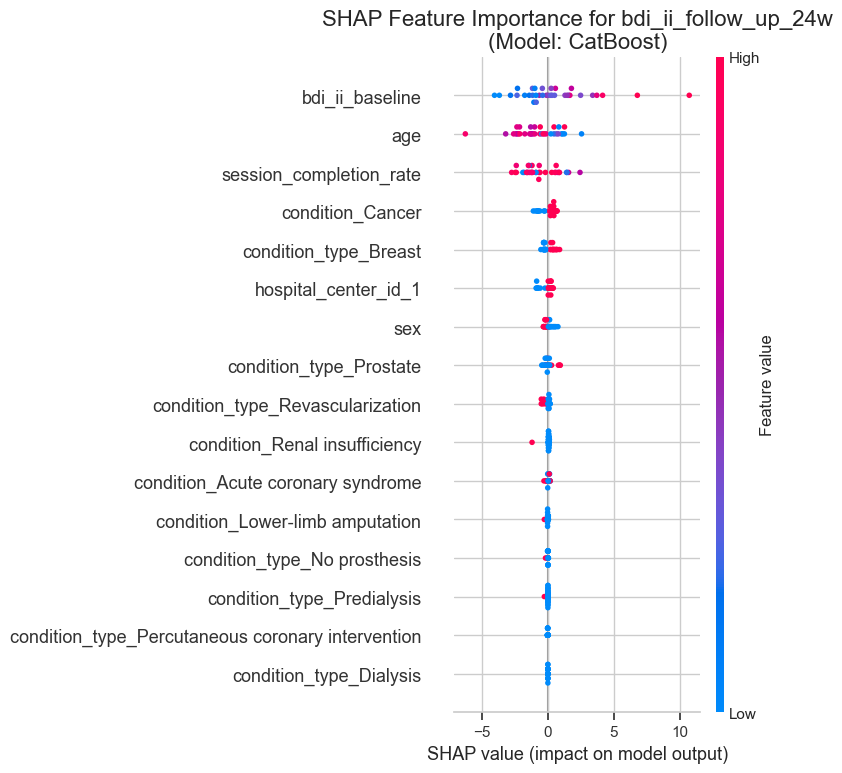

In [44]:
train_and_evaluate_with_FE(df_encoded, 'bdi_ii_follow_up_24w')